# Survival Analysis 
## Used to model time until an event occurs

In [4]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi
import matplotlib.pyplot as plt

In [5]:
#Rossi recidivism data
df = load_rossi()
df.head()
x_vars = ['arrest','fin','age','race','wexp','mar','paro','prio']
X = df[x_vars]

In [6]:
#Cox Proportional Hazards model
cph_model = CoxPHFitter()
results = cph_model.fit(df, duration_col='week', event_col='arrest')
results.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
fin,-0.379422,0.684257,0.191379,-0.754519,-0.004325,0.470237,0.995684,0.0,-1.982565,0.047416,4.398479
age,-0.057438,0.944181,0.021999,-0.100556,-0.014320,0.904335,0.985782,0.0,-2.610869,0.009031,6.790860
race,0.313900,1.368753,0.307993,-0.289755,0.917555,0.748447,2.503162,0.0,1.019179,0.308118,1.698445
wexp,-0.149796,0.860884,0.212224,-0.565748,0.266156,0.567935,1.304939,0.0,-0.705837,0.480290,1.058023
mar,-0.433704,0.648104,0.381868,-1.182152,0.314744,0.306618,1.369908,0.0,-1.135743,0.256064,1.965422
paro,-0.084871,0.918631,0.195757,-0.468547,0.298805,0.625911,1.348247,0.0,-0.433554,0.664612,0.589415
prio,0.091497,1.095814,0.028649,0.035347,0.147647,1.035979,1.159104,0.0,3.193777,0.001404,9.475989


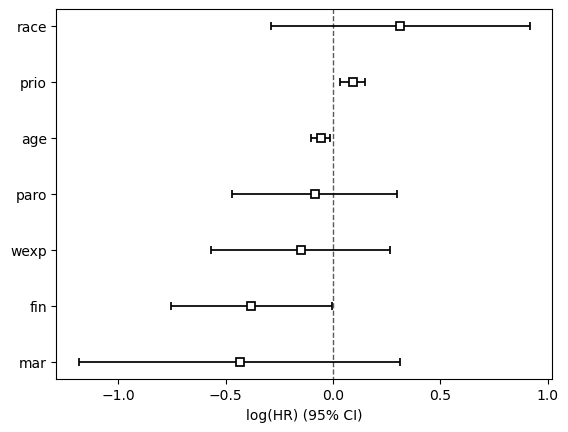

In [12]:
cph_model.plot()
plt.show()

<Axes: >

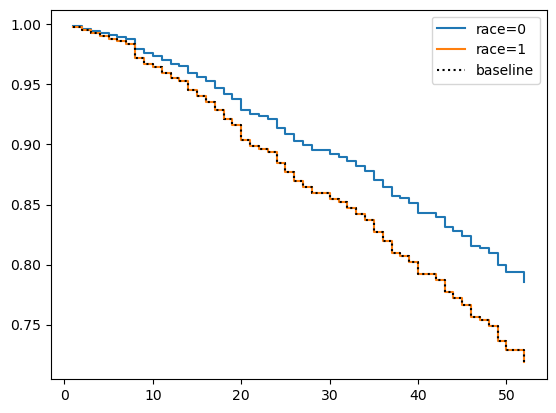

In [16]:
# Plot survival curves for different levels of the 'fin' variable
cph_model.plot_partial_effects_on_outcome('race', values=[0, 1])

ValueError: Values must be numeric: no strings, datetimes, objects, etc.

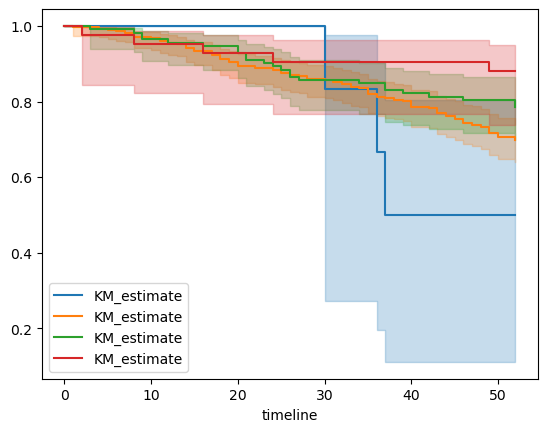

In [22]:
from lifelines import KaplanMeierFitter
import numpy as np
import pandas as pd

#Stratifying the dataset into age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 25, 35, 45, 55, 65, 75], right=False)

kmf = KaplanMeierFitter()

for group, df_group in df.groupby('age_group'):
    kmf.fit(df_group['week'], df_group['arrest'], )#label=str(group))
    kmf.plot()

# Customize the plot
plt.xlabel('Time (Weeks)')
plt.ylabel('Survival Probability')
plt.title('Survival Probabilities by Age Group')
plt.show()

In [2]:
#Predict the survival function for each observation
survival_functions = cph.predict_survival_function(X)


X2 = pd.DataFrame({
    'fin': [1, 0],
    'age': [35, 50],
    'race': [1, 1],
    'wexp': [0, 1],
    'mar': [0, 1],
    'paro': [1, 0],
    'prio': [3, 2]
})


#Plotting the survival function for the first individual/group in X
survival_functions.iloc[:, 0].plot()
plt.xlabel('Weeks Since Release')
plt.ylabel('Recidivism Probability')
plt.title('Predicted Survival Curve')
plt.show()

NameError: name 'cph' is not defined

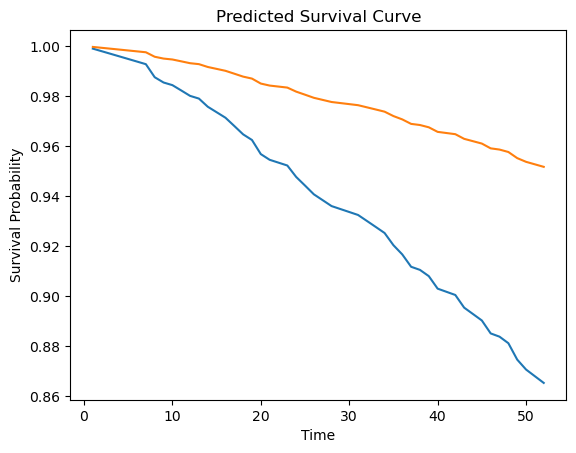

In [90]:
X2 = pd.DataFrame({
    'fin': [1, 0],
    'age': [35, 50],
    'race': [1, 1],
    'wexp': [0, 1],
    'mar': [0, 1],
    'paro': [1, 0],
    'prio': [3, 2]
})

survival_functions = cph.predict_survival_function(X2)

#Plotting the survival function for individuals in X2
survival_functions.iloc[:, 0].plot()
survival_functions.iloc[:, 1].plot()

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Predicted Survival Curve')
plt.show()

(array([ 1.,  0.,  0.,  0.,  2.,  2.,  1.,  2.,  5., 10.]),
 array([20. , 23.2, 26.4, 29.6, 32.8, 36. , 39.2, 42.4, 45.6, 48.8, 52. ]),
 <BarContainer object of 10 artists>)

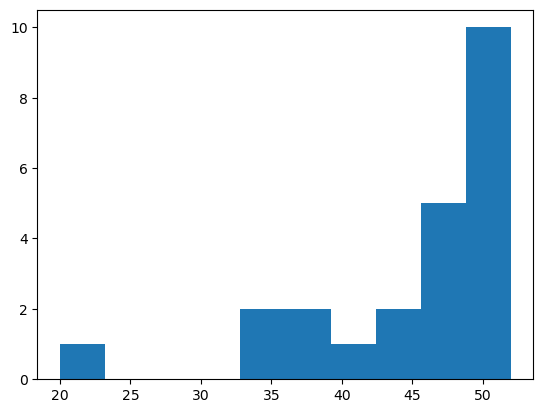

In [92]:
#Predict median survival times
median_survival_times = cph.predict_median(X)
median_survival_times 
#plt.hist(median_survival_times)

#Remove inf values for plotting
without_inf = median_survival_times[np.isfinite(median_survival_times)]
plt.hist(without_inf)